# Proyecto Primera Entrega - Visualizaciones en Python
## Dataset: Accidentalidad en Madrid 2023
## Alumna: Tereso, Maria Agustina

### Abstract

En este proyecto se analiza el dataset de Accidentalidad en Madrid 2023, que contiene más de 48.000 registros sobre diferentes tipos de accidentes, zonas de la ciudad, horarios, condiciones meteorológicas y características de las personas involucradas. El objetivo fue realizar un análisis exploratorio utilizando Python para identificar patrones, tendencias y posibles factores asociados a los siniestros.

Previamente se realizó una limpieza básica de datos y se crearon nuevas variables como el mes, la hora numérica y tramos horarios para facilitar el análisis. Luego generamos visualizaciones univariadas, bivariadas y multivariadas, que permitieron observar cómo se distribuyen los accidentes según el tipo, el distrito, la hora del día y la lesividad.

Entre los principales resultados, encontramos que las colisiones fronto-laterales y los alcances son los accidentes más comunes, que la mayor cantidad de siniestros ocurre entre las 14 y 20 horas, y que distritos como Puente de Vallecas y Chamartín presentan valores más altos. Además, las proporciones de tipos de persona involucrada y los niveles de lesividad se mantienen bastante estables entre los meses.


### Preguntas de interés / Hipótesis

1. ¿En qué horarios ocurren más accidentes?
2. ¿Qué distritos presentan mayor cantidad de incidentes?
3. ¿Qué tipo de accidente es el más frecuente?
4. ¿Existen patrones de lesividad según el tipo de persona involucrada?
5. ¿El rango etario influye en la probabilidad de lesiones graves?
6. ¿La mayoría de accidentes ocurre con condiciones meteorológicas normales?
7. ¿Se observan diferencias entre días de semana y fines de semana?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


In [2]:
url = "https://raw.githubusercontent.com/agustereso011/Proyecto_Final_DS_I_Tereso/refs/heads/main/Accidentalidad_2023.csv"
df = pd.read_csv(url)
df.head()


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,hora_dt,hora_numero,lesion_grave
0,2023S000001,2023-01-01,1:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Conductor,De 55 a 59 años,Mujer,Sin asistencia sanitaria,443397.0,4478129.0,0.0,1900-01-01 01:15:00,1,0.0
1,2023S000001,2023-01-01,1:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 21 a 24 años,Hombre,Sin asistencia sanitaria,443397.0,4478129.0,0.0,1900-01-01 01:15:00,1,0.0
2,2023S000001,2023-01-01,1:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 21 a 24 años,Hombre,Sin asistencia sanitaria,443397.0,4478129.0,0.0,1900-01-01 01:15:00,1,0.0
3,2023S000001,2023-01-01,1:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 21 a 24 años,Mujer,Asistencia sanitaria sólo en el lugar del acci...,443397.0,4478129.0,0.0,1900-01-01 01:15:00,1,0.0
4,2023S000001,2023-01-01,1:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 55 a 59 años,Hombre,Asistencia sanitaria sólo en el lugar del acci...,443397.0,4478129.0,0.0,1900-01-01 01:15:00,1,0.0


In [3]:
# limpieza de tipo de datos
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True, errors='coerce')
df['hora_dt'] = pd.to_datetime(df['hora_dt'], errors='coerce')
categoricas = [
    'distrito','tipo_accidente','estado_meteorológico',
    'tipo_vehiculo','tipo_persona','rango_edad','sexo','lesividad'
]

for c in categoricas:
    df[c] = df[c].astype('category')



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48830 entries, 0 to 48829
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        48830 non-null  object        
 1   fecha                 19161 non-null  datetime64[ns]
 2   hora                  48830 non-null  object        
 3   localizacion          48830 non-null  object        
 4   numero                48830 non-null  object        
 5   cod_distrito          48830 non-null  float64       
 6   distrito              48830 non-null  category      
 7   tipo_accidente        48830 non-null  category      
 8   estado_meteorológico  48830 non-null  category      
 9   tipo_vehiculo         48830 non-null  category      
 10  tipo_persona          48830 non-null  category      
 11  rango_edad            48830 non-null  category      
 12  sexo                  48830 non-null  category      
 13  lesividad       

###Valores Perdidos

In [5]:
# Cantidad de nulos
nulos = df.isna().sum()

pct_nulos = (df.isna().mean() * 100).round(2)

tabla_nulos = pd.DataFrame({
    'nulos': nulos,
    'pct_nulos': pct_nulos
}).sort_values('pct_nulos', ascending=False)

tabla_nulos

,nulos,pct_nulos
fecha,29669,60.76
lesion_grave,22885,46.87
lesividad,22885,46.87
positiva_alcohol,182,0.37
localizacion,0,0.00
hora,0,0.00
num_expediente,0,0.00
numero,0,0.00
estado_meteorológico,0,0.00
cod_distrito,0,0.00


/tmp/ipython-input-815846211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


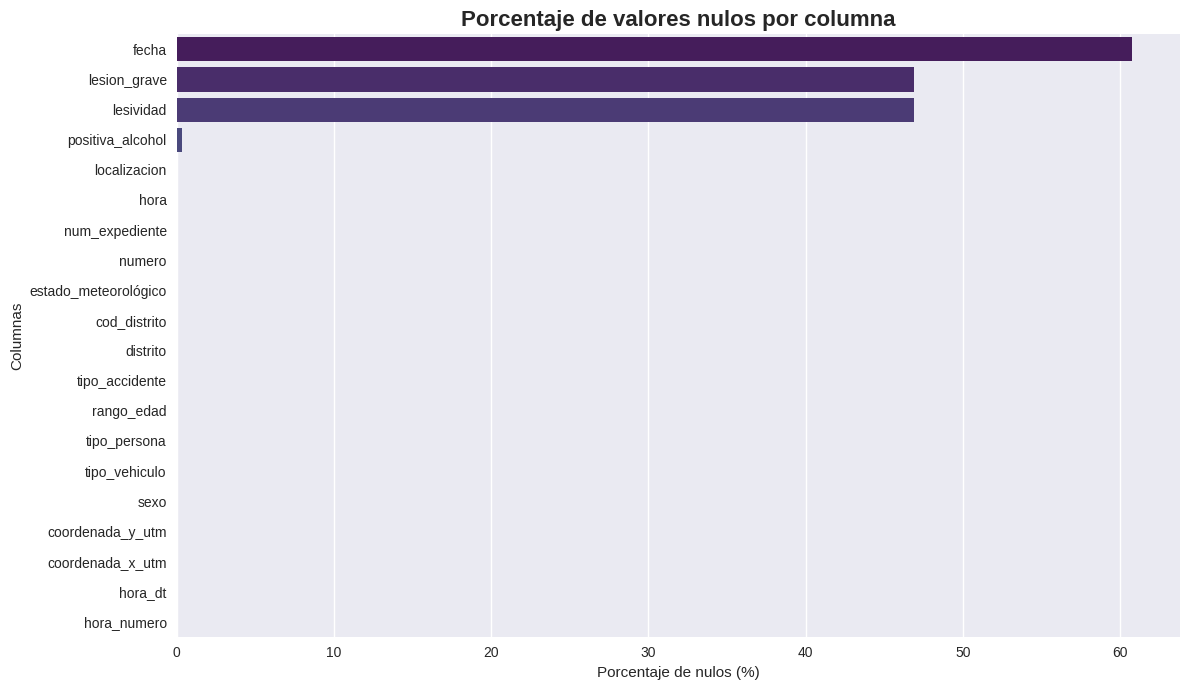

In [6]:
plt.figure(figsize=(12,7))
sns.barplot(
    data=tabla_nulos.reset_index(),
    x='pct_nulos',
    y='index',
    palette='viridis'
)

plt.title('Porcentaje de valores nulos por columna', fontsize=16, weight='bold')
plt.xlabel('Porcentaje de nulos (%)')
plt.ylabel('Columnas')
sns.despine()
plt.tight_layout()
plt.show()

En el dataset aparecen valores faltantes principalmente en cuatro columnas: fecha, mes, lesividad y lesion_grave.
Las columnas fecha y mes tienen alrededor del 60% de nulos. Esto ocurre porque muchos accidentes directamente no tienen registrada la fecha completa. No es posible recuperar esa información, y por eso no se usa la variable fecha como parte central del análisis.

De todas formas, sí se usa la columna mes cuando hacemos gráficos temporales, pero solo con los registros que tienen un mes válido. Los registros con mes faltante simplemente quedan fuera de esas visualizaciones sin afectar los resultados.

Las columnas lesividad y lesion_grave tienen casi un 47% de nulos. En este caso, los valores faltantes no son un error, significan que el accidente no dejó lesionados o que no se registró ese dato. Por eso se decide conservarlos así, sin imputarlos.

La columna positiva_alcohol tiene muy pocos nulos (0.37%), relacionados a casos donde no se realizó el test. También se deja sin modificar.

El resto de las columnas no presenta valores faltantes.



### Analisis Univariadas


/tmp/ipython-input-3059081297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


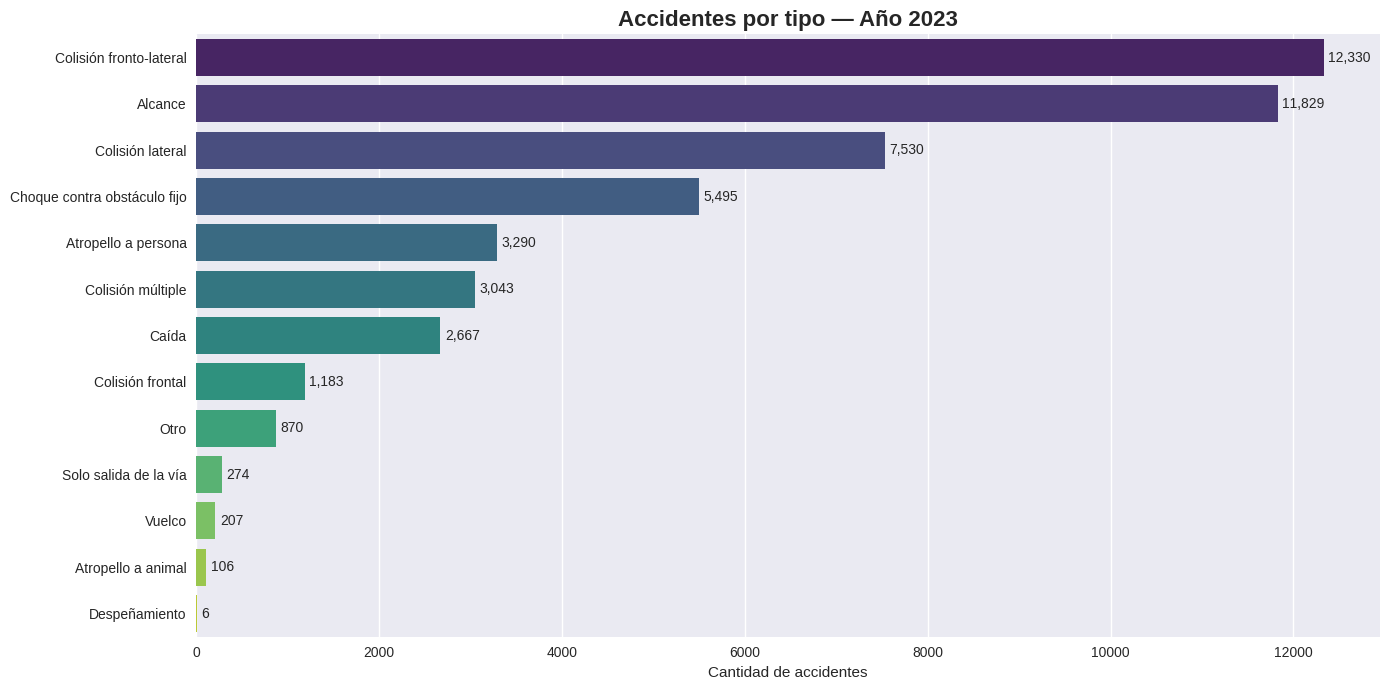

In [7]:
# Tipo De Accidente
plt.figure(figsize=(14,7))

ax = sns.countplot(
    data=df,
    y='tipo_accidente',
    order=df['tipo_accidente'].value_counts().index,
    palette="viridis"
)

sns.despine(left=True, bottom=True)

plt.title('Accidentes por tipo — Año 2023', fontsize=16, weight='bold')
plt.xlabel('Cantidad de accidentes')
plt.ylabel('')

for p in ax.patches:
    ax.annotate(
        format(int(p.get_width()), ','),
        (p.get_width() + 50, p.get_y() + p.get_height()/2),
        va='center'
    )

plt.tight_layout()
plt.show()


####Diagnóstico:

En el gráfico se muestra que la mayoría de los accidentes en 2023 corresponden a colisiones entre vehículos, especialmente la colisión fronto-lateral y el alcance, que son por lejos los tipos más frecuentes. Estos dos concentran una porción muy importante del total y reflejan situaciones típicas del tráfico urbano tales como maniobras bruscas, cambios de carril y frenadas repentinas.

En segundo nivel aparecen la colisión lateral y el choque contra obstáculo fijo, lo que sugiere también problemas de percepción, distancia y control del vehículo.

Los accidentes menos frecuentes son los vuelcos, atropello a animal, solo salida de vía y desplazamiento, que representan eventos más aislados o condiciones específicas.

En general, el patrón indica que los accidentes más comunes están asociados al flujo normal del tránsito y la interacción entre vehículos, más que a situaciones extremas o excepcionales.


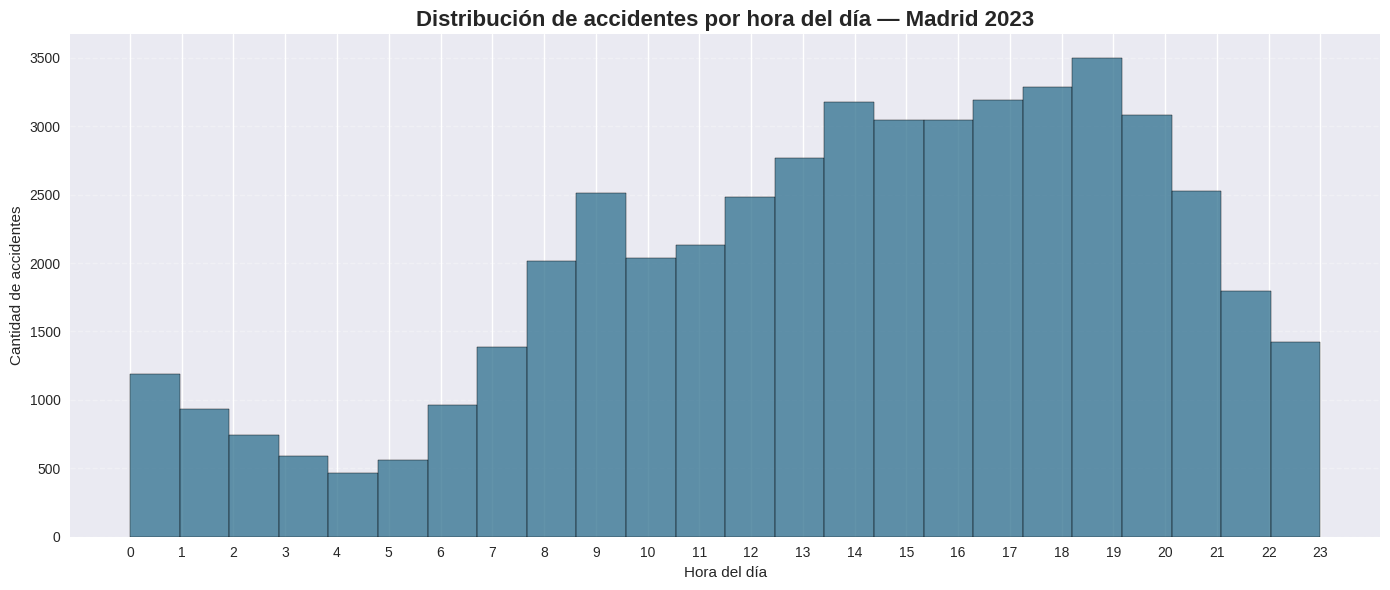

In [8]:
# Hora del dia
plt.figure(figsize=(14,6))

sns.histplot(
    data=df,
    x='hora_numero',
    bins=24,
    kde=False,
    color=sns.color_palette("viridis", 24)[8]
)

plt.title('Distribución de accidentes por hora del día — Madrid 2023',
          fontsize=16, weight='bold')

plt.xlabel('Hora del día')
plt.ylabel('Cantidad de accidentes')

plt.xticks(range(0,24))

plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()




#### Diagnóstico:

En el gráfico se muestra un patrón horario muy marcado. Entre la medianoche y las 6 de la mañana los accidentes son relativamente bajos, lo cual coincide con una menor circulación de vehículos. A partir de las 7:00 se observa un aumento rápido, asociado al comienzo de la actividad laboral y escolar.

La cantidad de accidentes continúa creciendo a lo largo de la mañana y se mantiene elevada durante la tarde. El pico máximo se produce entre las 18:00 y las 20:00, que es el horario típico de regreso a casa, mayor congestión vehicular y cansancio acumulado del día. Después de las 21:00 la cantidad de accidentes comienza a descender nuevamente.

Este patrón es consistente con la dinámica diaria del tránsito urbano, cuanto más movimiento hay más interacción entre vehículos generando más probabilidad de siniestros. También se refleja la importancia de las franjas de entrada y salida laboral como momentos de mayor riesgo.


/tmp/ipython-input-2733253005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


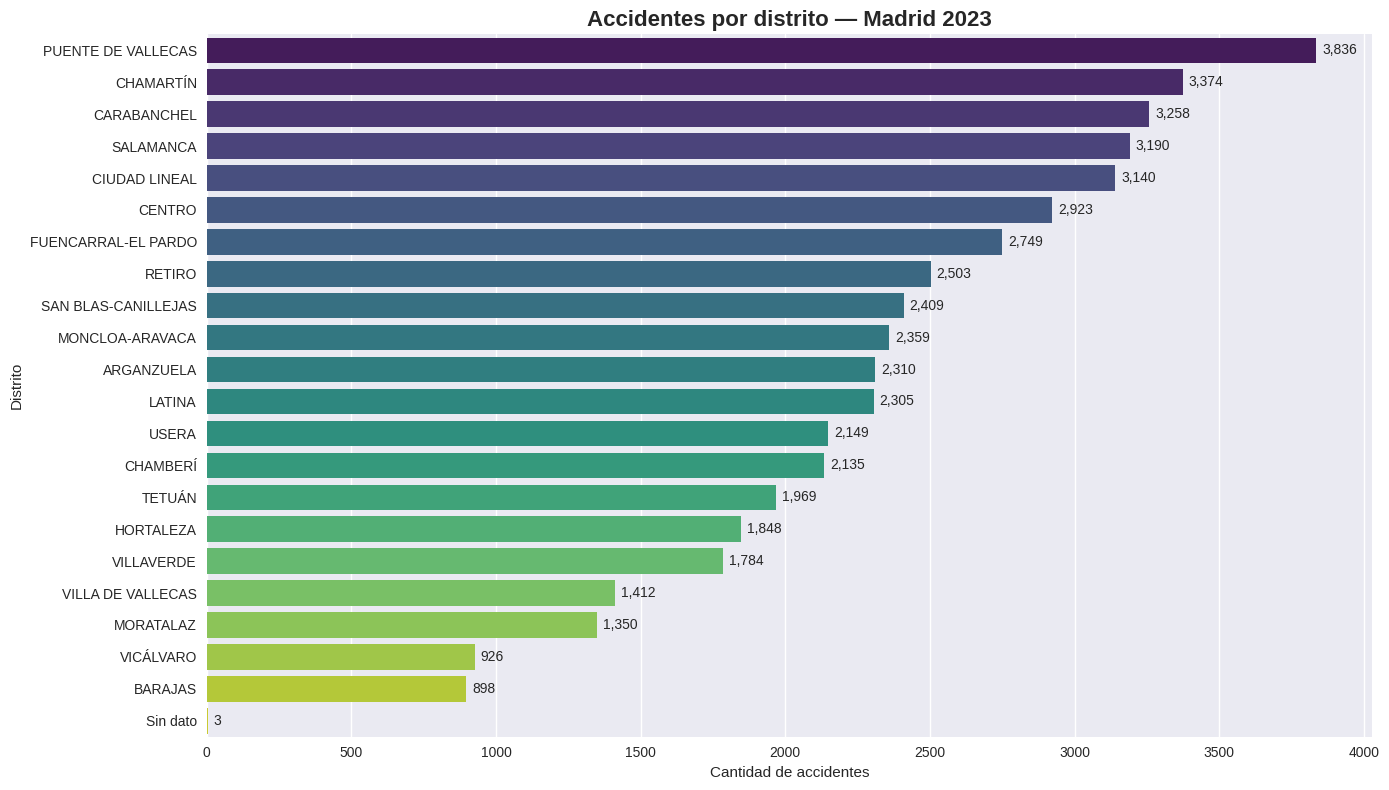

In [9]:
# Distrito

plt.figure(figsize=(14,8))

ax = sns.countplot(
    data=df,
    y='distrito',
    order=df['distrito'].value_counts().index,
    palette="viridis"
)

sns.despine(left=True, bottom=True)

plt.title('Accidentes por distrito — Madrid 2023', fontsize=16, weight='bold')
plt.xlabel('Cantidad de accidentes')
plt.ylabel('Distrito')

for p in ax.patches:
    ax.annotate(
        format(int(p.get_width()), ','),
        (p.get_width() + 20, p.get_y() + p.get_height()/2),
        va='center'
    )

plt.tight_layout()
plt.show()



#### Diagnóstico:

En el gráfico se muestra que la cantidad de accidentes varía notablemente entre los distintos distritos de Madrid. Los valores más altos se concentran en Puente de Vallecas, Chamartín, Carabanchel y Salamanca, que superan ampliamente al resto. Estos distritos tienen gran densidad de tránsito, numerosas avenidas principales y alto flujo de vehículos durante todo el día, lo que en parte explica el mayor número de siniestros.

En un nivel intermedio aparecen Ciudad Lineal, Centro, Retiro, San Blas-Canillejas y Moncloa-Aravaca, que también registran una actividad vial intensa pero con menor volumen comparado con los distritos líderes.

Los valores más bajos se observan en Vicálvaro, Villa de Vallecas, Barajas y Moratalaz, que son zonas más residenciales o con menor densidad vehicular. En estos casos, la infraestructura y el tipo de circulación reducen la probabilidad de accidentes.

En conjunto, el gráfico evidencia un patrón claro: a mayor densidad de tráfico y mayor concentración de nodos viales, mayor cantidad de accidentes registrados. La distribución es coherente con la movilidad urbana de Madrid.



### Analisis Bivariadas

/tmp/ipython-input-706070932.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby('tipo_persona')['lesividad'].value_counts().unstack().fillna(0)


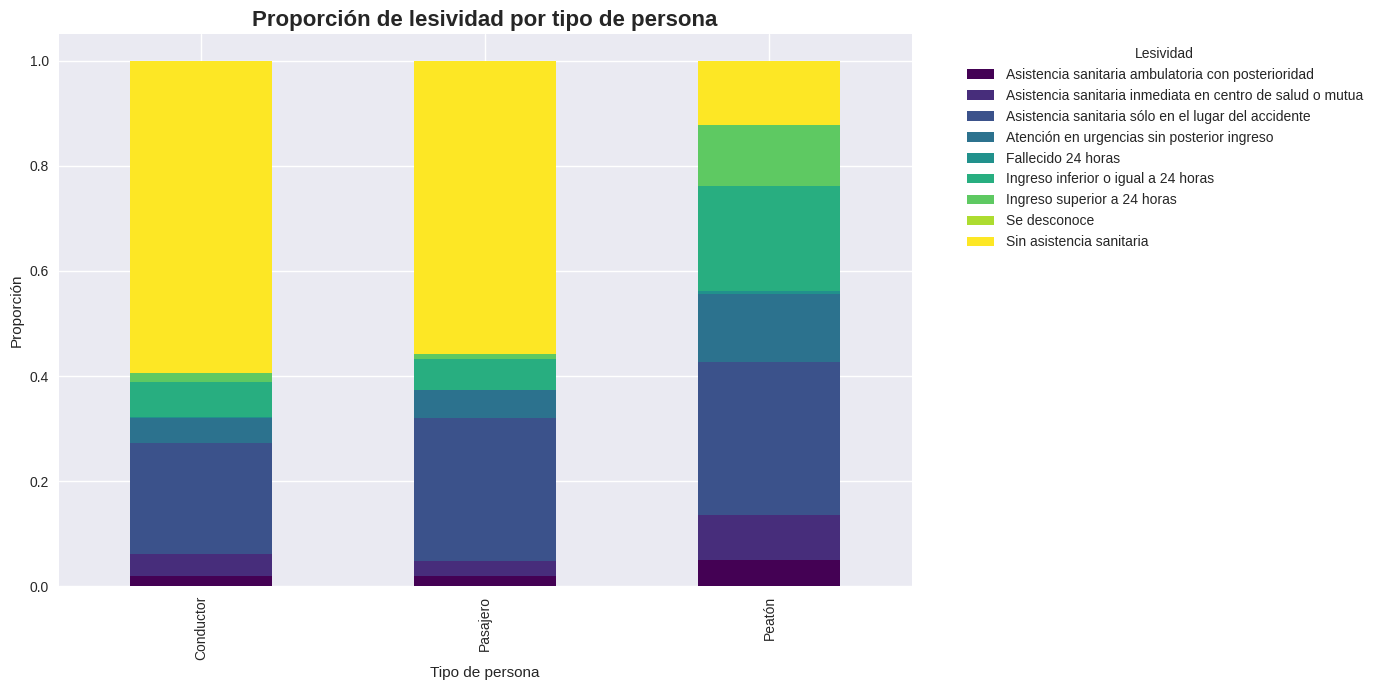

In [10]:
# Tipo de persona VS lesividad

tabla = df.groupby('tipo_persona')['lesividad'].value_counts().unstack().fillna(0)


tabla_prop = tabla.div(tabla.sum(axis=1), axis=0)

tabla_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(14,7),
    colormap='viridis'
)

plt.title('Proporción de lesividad por tipo de persona', fontsize=16, weight='bold')
plt.xlabel('Tipo de persona')
plt.ylabel('Proporción')
plt.legend(title='Lesividad', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()




####Diagnóstico:

En el gráfico se muestra cómo se distribuyen los diferentes niveles de lesividad entre conductores, pasajeros y peatones. Se observa que en los tres grupos existe una alta proporción de casos clasificados como “Sin asistencia sanitaria” o “Se desconoce”, lo que indica que gran parte de los accidentes no tuvo registro detallado del tipo de atención recibida.

En el caso de los peatones, se nota una mayor participación relativa de categorías graves, como “Atención en urgencias sin ingreso” y “Ingreso hospitalario”, lo que sugiere que este grupo tiende a sufrir lesiones más severas en comparación con conductores y pasajeros.

Conductores y pasajeros presentan perfiles muy similares, con una mayoría concentrada en registros leves o sin asistencia, aunque los conductores muestran una proporción ligeramente mayor de lesiones que requieren atención inmediata o posterior.

En resumen, el gráfico revela diferencias moderadas pero consistentes en la gravedad de las lesiones según el rol de la persona en el accidente, destacándose los peatones como el grupo más vulnerable.


<Figure size 1600x900 with 0 Axes>

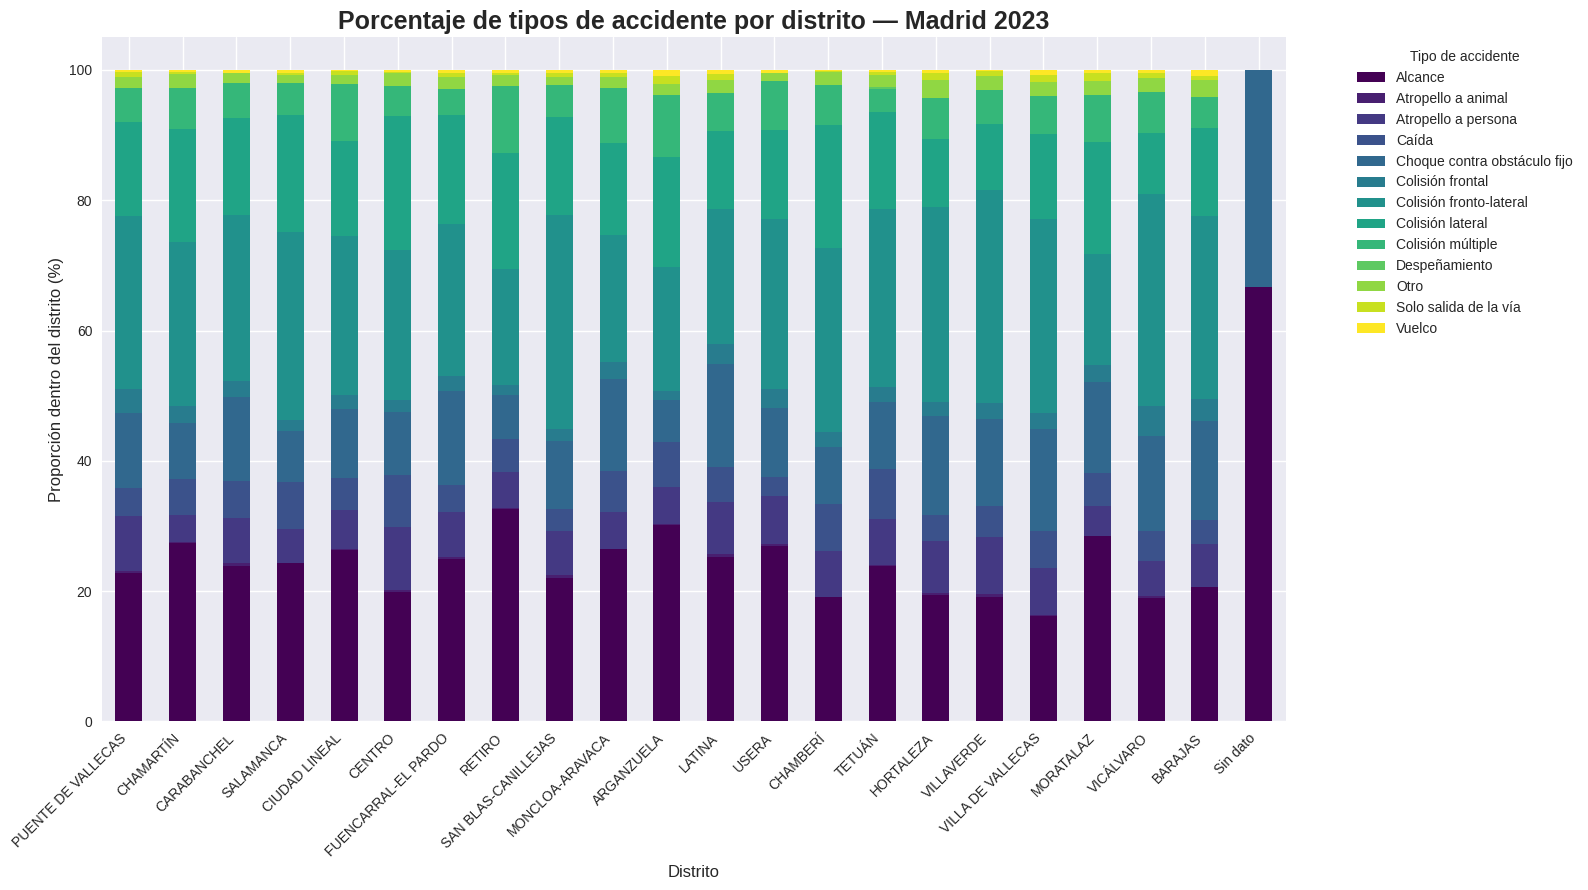

In [11]:
# Distrito VS tipo de accidente

tabla = pd.crosstab(df['distrito'], df['tipo_accidente'])
orden = tabla.sum(axis=1).sort_values(ascending=False).index
tabla = tabla.loc[orden]

tabla_prop = tabla.div(tabla.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16,9))
ax = tabla_prop.plot(kind='bar', stacked=True, colormap='viridis', figsize=(16,9))

plt.title('Porcentaje de tipos de accidente por distrito — Madrid 2023', fontsize=18, weight='bold')
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Proporción dentro del distrito (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de accidente', bbox_to_anchor=(1.05, 1))
sns.despine()
plt.tight_layout()
plt.show()



#### Diagnóstico:
En el gráfico se muestra la proporción que representa cada tipo de accidente dentro de cada distrito. Se observa que, pese a las diferencias en el volumen total de siniestros entre zonas de Madrid, la composición interna es bastante similar en todos los distritos.

Los accidentes de “Alcance”, “Colisión lateral” y “Colisión fronto-lateral” son los que predominan de forma consistente en casi todos los distritos, lo que indica que la dinámica vial general es muy parecida en toda la ciudad. Los tipos de accidente menos frecuentes —como “Vuelco”, “Desplazamiento” o “Atropello a animal”— aparecen con porcentajes muy bajos y prácticamente constantes.

Esto sugiere que las diferencias entre distritos se explican más por el volumen total de tránsito y exposición al riesgo, que por un patrón diferente de tipos de siniestro. En otras palabras, los distritos no presentan perfiles propios de accidentabilidad, sino que comparten un mismo patrón general.



### Visualizaciones Multivariadas

In [12]:
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True, errors='coerce')
df['mes'] = df['fecha'].dt.month


<Figure size 1400x700 with 0 Axes>

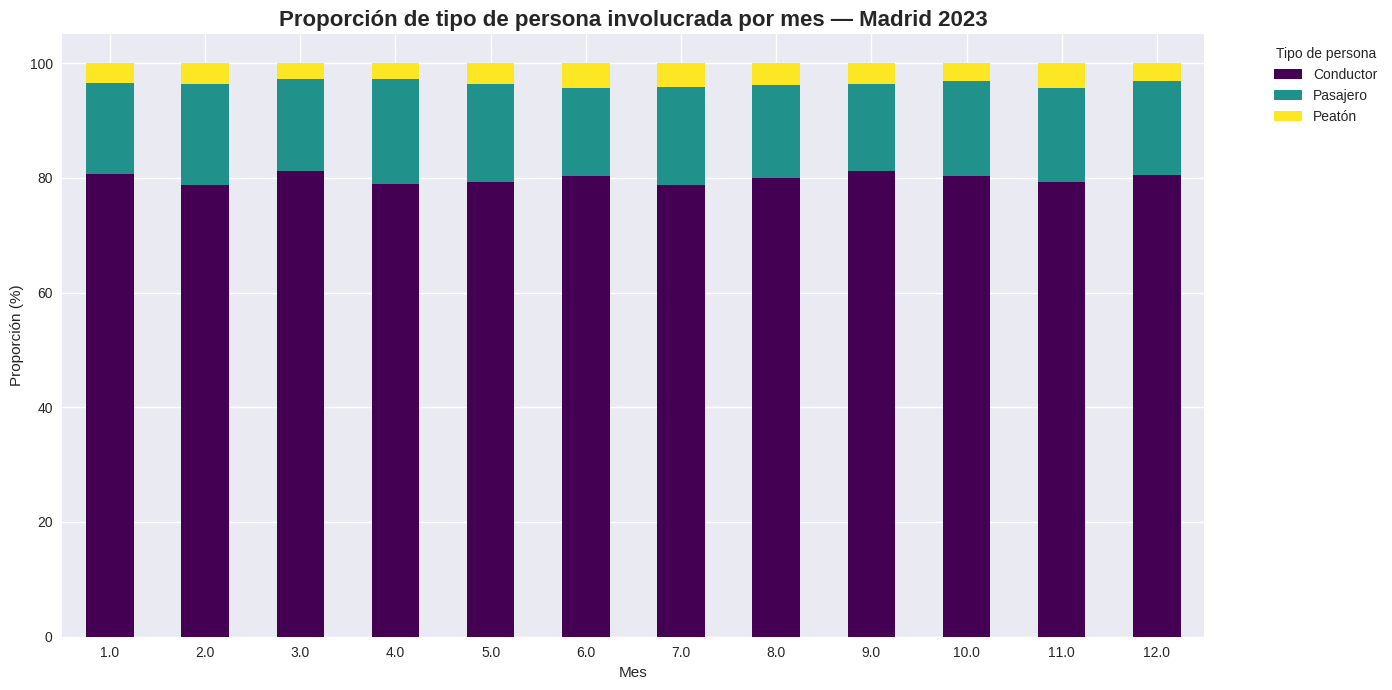

In [13]:
# Tipo de persona por mes

df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True, errors='coerce')
df['mes'] = df['fecha'].dt.month

tabla = pd.crosstab(df['mes'], df['tipo_persona'])
tabla_prop = tabla.div(tabla.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14,7))
ax = tabla_prop.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14,7))

sns.despine()
plt.title('Proporción de tipo de persona involucrada por mes — Madrid 2023', fontsize=16, weight='bold')
plt.xlabel('Mes')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=0)
plt.legend(title='Tipo de persona', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()






####Diagnóstico:

En el gráfico  se muestra que la distribución de conductores, pasajeros y peatones involucrados en accidentes se mantiene bastante estable a lo largo de los meses del año. En todos los meses, los conductores representan la gran mayoría de los casos, seguidos por los pasajeros, mientras que los peatones aparecen con un porcentaje menor pero constante.

Esta estabilidad indica que la composición de los involucrados no depende fuertemente de la estacionalidad ni del periodo del año. Es decir, aunque la movilidad urbana puede variar según el clima, vacaciones o eventos, la proporción entre tipos de persona involucrada en siniestros se mantiene prácticamente igual en todos los meses analizados.

En resumen, el gráfico evidencia que la mayor parte de los accidentes durante 2023 afectaron a conductores, en una proporción muy similar cada mes, mientras que peatones y pasajeros se mantienen como grupos minoritarios pero constantes.


<Figure size 1400x700 with 0 Axes>

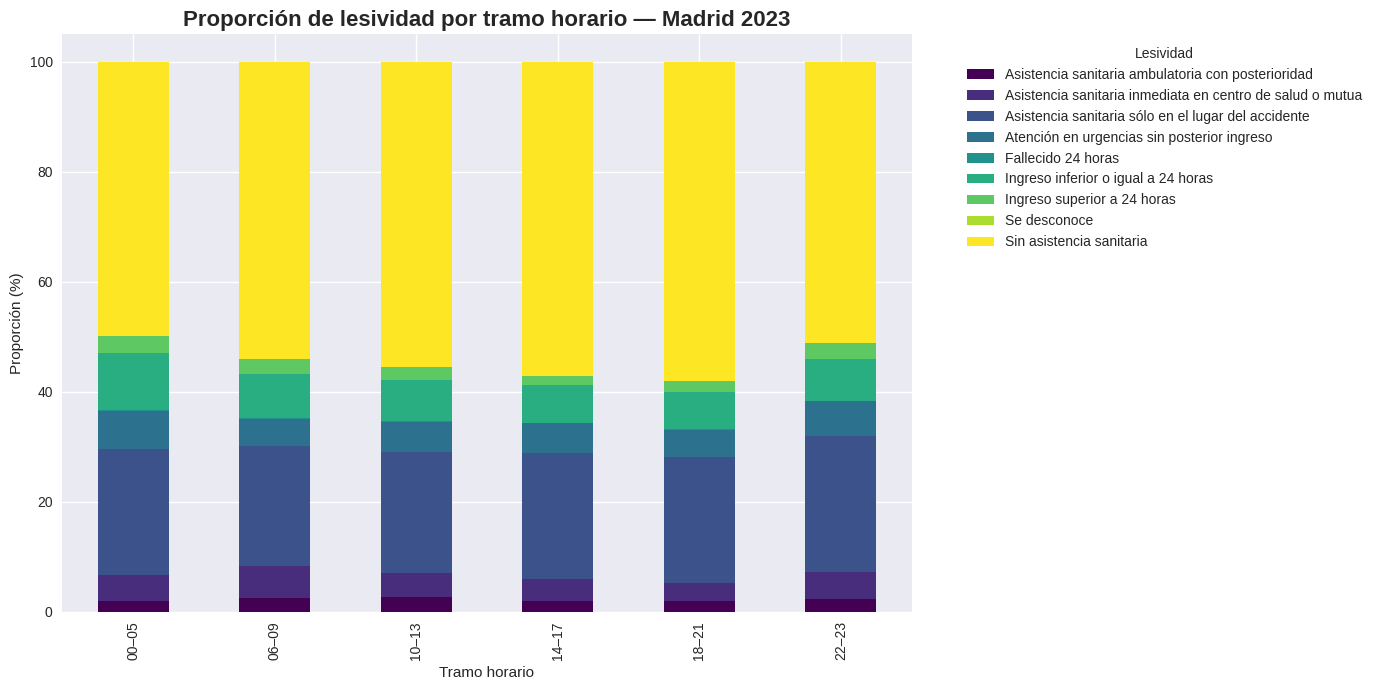

In [14]:
# Lesividad por tramo horario

bins = [0, 6, 10, 14, 18, 22, 24]
labels = ['00–05', '06–09', '10–13', '14–17', '18–21', '22–23']

df['tramo_hora'] = pd.cut(df['hora_numero'], bins=bins, labels=labels, right=False)

tabla = pd.crosstab(df['tramo_hora'], df['lesividad'])
tabla_prop = tabla.div(tabla.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14,7))
ax = tabla_prop.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14,7))

sns.despine()
plt.title('Proporción de lesividad por tramo horario — Madrid 2023', fontsize=16, weight='bold')
plt.xlabel('Tramo horario')
plt.ylabel('Proporción (%)')
plt.legend(title='Lesividad', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


####Diagnóstico:
En el gráfico se muestra cómo se distribuyen los diferentes niveles de lesividad según el tramo horario del día. En todos los rangos horarios se observa que la categoría “Sin asistencia sanitaria” es la más predominante, aunque disminuye levemente en el tramo 22–23, donde la distribución se vuelve más equilibrada y aumenta la participación de otras formas de atención médica.

Al analizar las lesiones más graves, se nota un ligero incremento de la proporción de casos “Fallecido 24 horas” en los tramos 00–05 y 22–23, siendo estos momentos del día donde la gravedad relativa de los accidentes aparece más marcada. También se observa un aumento en categorías como “Atención en urgencias sin posterior ingreso” y “Asistencia sanitaria inmediata en centro de salud, especialmente en los tramos 00–05, 06–09 y 22–23, lo que indica una mayor necesidad de atención en esos horarios.

Durante los tramos centrales del día (10–17), la composición de la lesividad es más estable y presenta menos variaciones. En conjunto, el gráfico sugiere que la madrugada y la franja final del día concentran una mayor proporción relativa de lesiones que requieren algún tipo de asistencia sanitaria o que presentan mayor severidad.


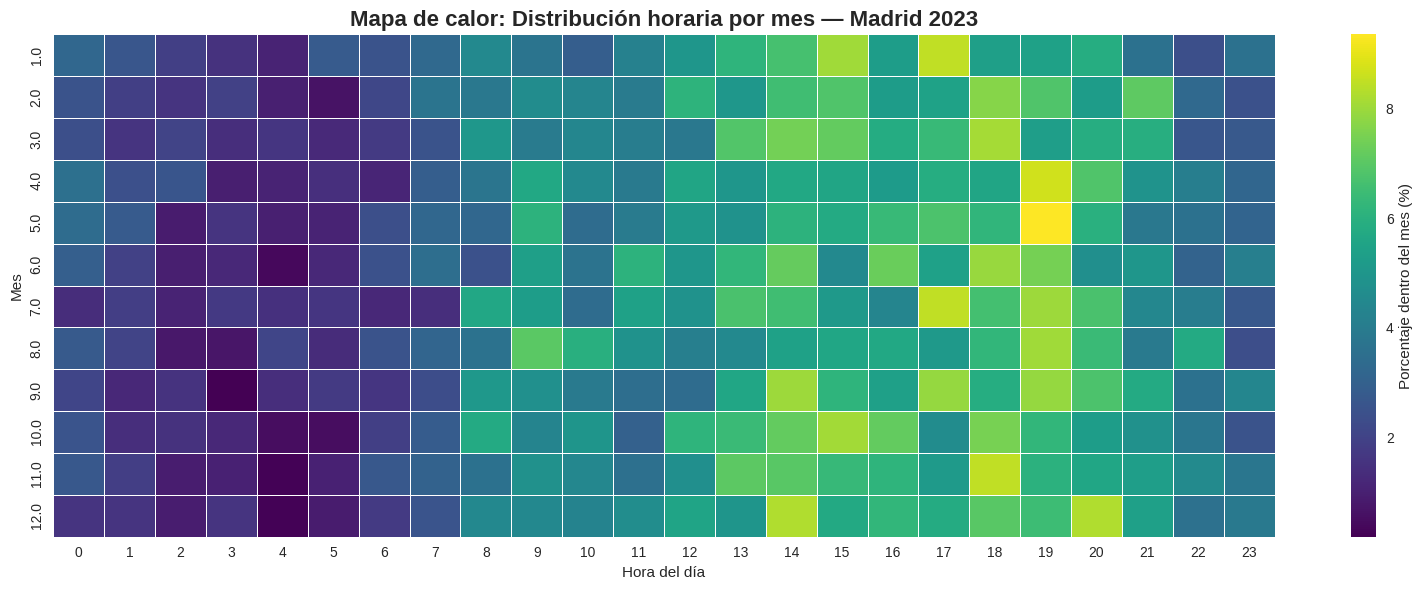

In [15]:
# Hora x mes x proporcion


tabla = pd.crosstab(df['mes'], df['hora_numero'])
tabla_prop = tabla.div(tabla.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16,6))
sns.heatmap(
    tabla_prop,
    cmap='viridis',
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Porcentaje dentro del mes (%)'}
)

plt.title('Mapa de calor: Distribución horaria por mes — Madrid 2023', fontsize=16, weight='bold')
plt.xlabel('Hora del día')
plt.ylabel('Mes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

####Diagnóstico:
En el mapa de calor  se permite identificar con claridad cómo se distribuyen los accidentes a lo largo del día en cada mes del año. Se observa un patrón muy consistente, durante la madrugada, especialmente entre las 00 y las 06 horas, la participación de accidentes es mínima, representada por los colores más oscuros. A partir de las 07 y 08 de la mañana comienza un incremento moderado, que se mantiene estable durante toda la mañana y el mediodía, mostrando tonos intermedios que indican una actividad media.

El comportamiento más destacado aparece en la franja de la tarde. En prácticamente todos los meses, entre las 17 y las 19 horas se registran los valores más altos del día, evidenciados por los colores más intensos del mapa. Esta franja se convierte así en el horario crítico donde los accidentes representan el mayor porcentaje dentro de cada mes. Después de las 20 horas la proporción vuelve a descender gradualmente, retomando colores más suaves que indican menor participación relativa.

En cuanto a diferencias estacionales, se observa que algunos meses como mayo, junio, julio y también noviembre y diciembre presentan picos vespertinos ligeramente más intensos y prolongados. En cambio, los primeros meses del año muestran concentraciones altas pero un poco más acotadas en el tiempo, a veces adelantadas hacia las 15 o 16 horas. Sin embargo, la estructura general se mantiene estable a lo largo del año.

En resumen, el mapa muestra que la distribución horaria es similar en todos los meses, poca actividad de madrugada, incremento progresivo por la mañana y mediodía, y un pico muy marcado en la tarde. Este comportamiento sugiere que el tránsito vespertino ,posiblemente asociado al regreso laboral, mayor densidad vehicular y condiciones de cansancio, concentra la mayor proporción de accidentes durante todo el año.